In [4]:
import numpy as np
import torch


import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets,transforms
transform = transforms.Compose([transforms.Scale(28,28),
                                transforms.ToTensor(), 
                               transforms.Normalize([0.5],[0.5]),
                             ])
                              
trainset = datasets.MNIST('MNIST_data/', download = True, train = True,transform= transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)                              

/home/akshita/.local/lib/python3.7/site-packages/torchvision/transforms/transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [6]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


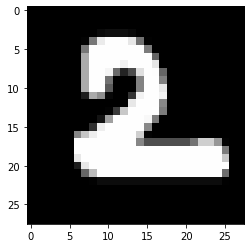

In [7]:
plt.imshow(images[1].numpy().squeeze(),cmap = 'Greys_r')

In [8]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0],-1)

w1=torch.randn(784,256)
b1=torch.randn(256)

w2=torch.randn(256,10)
b2=torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)
out=torch.mm(h,w2)+b2
print(out.shape)

torch.Size([64, 10])


In [10]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim= 1).view(-1,1)

probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [13]:
from torch import nn
import torch.nn.functional as F

In [14]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        X = F.softmax(self.output(x), dim =1)
        
        return x